# 半监督SVM

虽然书上的我实现不了，我决定自己实现一种算法

起名为掉包侠半监督SVM算法

## 生成数据集

使用西瓜数据集4.0举例

<div><img src="./img/0901.png", width=900>

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [267]:
data=pd.read_csv('data_watermelon/watermelon_4.csv')
data

,a,b
0,0.697,0.460
1,0.774,0.376
2,0.634,0.264
3,0.608,0.318
4,0.556,0.215
5,0.403,0.237
6,0.481,0.149
7,0.437,0.211
8,0.666,0.091
9,0.243,0.267


注意是二分类问题 假设 

In [328]:
# 生成label
Y = np.full(len(data), -1)
Y[3] = 0
Y[24] = 0
Y[11] = 1
Y[19] = 1
Y[13] = 0
Y[16] = 1
Y

array([-1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  1, -1,  0, -1, -1,  1,
       -1, -1,  1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1])

查看数据分布

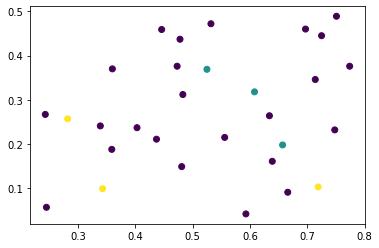

In [329]:
X = data.values
plt.scatter(X[:,0],X[:,1],c=Y);

## 拆分已标记数据与未标记数据

In [270]:
X_labeled = X[Y!=-1]
X_labeled

array([[0.608, 0.318],
       [0.343, 0.099],
       [0.657, 0.198],
       [0.719, 0.103],
       [0.282, 0.257],
       [0.525, 0.369]])

In [271]:
Y_labeled = Y[Y!=-1]
Y_labeled

array([0, 1, 0, 1, 1, 0])

In [272]:
X_unlabeled = X[Y==-1]
X_unlabeled

array([[0.697, 0.46 ],
       [0.774, 0.376],
       [0.634, 0.264],
       [0.556, 0.215],
       [0.403, 0.237],
       [0.481, 0.149],
       [0.437, 0.211],
       [0.666, 0.091],
       [0.243, 0.267],
       [0.245, 0.057],
       [0.639, 0.161],
       [0.36 , 0.37 ],
       [0.593, 0.042],
       [0.359, 0.188],
       [0.339, 0.241],
       [0.748, 0.232],
       [0.714, 0.346],
       [0.483, 0.312],
       [0.478, 0.437],
       [0.751, 0.489],
       [0.532, 0.472],
       [0.473, 0.376],
       [0.725, 0.445],
       [0.446, 0.459]])

In [273]:
Y_unlabeled = Y[Y==-1]
Y_unlabeled

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1])

## 首先使用已标记数据训练一个SVM

In [274]:
from sklearn import svm
clf = svm.SVC(probability=True)
clf.fit(X_labeled, Y_labeled)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [275]:
Y_predict = clf.predict(X_unlabeled)
Y_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [276]:
clf.predict_proba(X_unlabeled)

array([[0.46643703, 0.53356297],
       [0.47640982, 0.52359018],
       [0.46240894, 0.53759106],
       [0.48348557, 0.51651443],
       [0.53221103, 0.46778897],
       [0.52373372, 0.47626628],
       [0.52397656, 0.47602344],
       [0.51818915, 0.48181085],
       [0.57505578, 0.42494422],
       [0.57639209, 0.42360791],
       [0.49462063, 0.50537937],
       [0.52408715, 0.47591285],
       [0.53105892, 0.46894108],
       [0.55840697, 0.44159303],
       [0.55652713, 0.44347287],
       [0.4869715 , 0.5130285 ],
       [0.46156079, 0.53843921],
       [0.48105513, 0.51894487],
       [0.47441728, 0.52558272],
       [0.48208736, 0.51791264],
       [0.46550993, 0.53449007],
       [0.47670202, 0.52329798],
       [0.46961824, 0.53038176],
       [0.48545438, 0.51454562]])

可能性的均值和方差

In [277]:
index_0 = clf.predict_proba(X_unlabeled)[:, 0].argmax()
index_0

9

In [278]:
clf.predict_proba(X_unlabeled)[index_0]

array([0.57639209, 0.42360791])

In [279]:
index_1 = clf.predict_proba(X_unlabeled)[:, 1].argmax()
index_1

16

In [280]:
clf.predict_proba(X_unlabeled)[index_1]

array([0.46156079, 0.53843921])

In [281]:
sample_0 = X_unlabeled[index_0]
sample_0

array([0.245, 0.057])

In [282]:
sample_0_label = Y_predict[index_0]
sample_0_label

1

In [283]:
sample_1 = X_unlabeled[index_1]
sample_1.reshape((-1,2))

array([[0.714, 0.346]])

In [284]:
sample_1_label = Y_predict[index_1]
sample_1_label

0

In [285]:
X_labeled.shape

(6, 2)

In [286]:
X_labeled = np.append(X_labeled, sample_0.reshape((-1,2)), axis=0)
X_labeled = np.append(X_labeled, sample_1.reshape((-1,2)), axis=0)
Y_labeled = np.append(Y_labeled, sample_0_label)
Y_labeled = np.append(Y_labeled, sample_1_label)

In [287]:
np.delete(X_unlabeled, index_0, axis=0)

array([[0.697, 0.46 ],
       [0.774, 0.376],
       [0.634, 0.264],
       [0.556, 0.215],
       [0.403, 0.237],
       [0.481, 0.149],
       [0.437, 0.211],
       [0.666, 0.091],
       [0.243, 0.267],
       [0.639, 0.161],
       [0.36 , 0.37 ],
       [0.593, 0.042],
       [0.359, 0.188],
       [0.339, 0.241],
       [0.748, 0.232],
       [0.714, 0.346],
       [0.483, 0.312],
       [0.478, 0.437],
       [0.751, 0.489],
       [0.532, 0.472],
       [0.473, 0.376],
       [0.725, 0.445],
       [0.446, 0.459]])

In [288]:
X_unlabeled = np.delete(X_unlabeled, index_1, axis=0)

In [289]:
len(X_unlabeled)

23

In [290]:
Y_unlabeled = np.delete(Y_unlabeled, index_0)

In [291]:
Y_unlabeled = np.delete(Y_unlabeled, index_1)

In [292]:
len(Y_unlabeled)

22

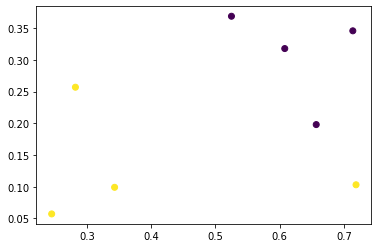

In [293]:
plt.scatter(X_labeled[:,0],X_labeled[:,1],c=Y_labeled);

## 迭代

In [314]:
len(Y_unlabeled)/2

12.0

In [321]:
X_labeled = X[Y!=-1]
# X_labeled

In [322]:
Y_labeled = Y[Y!=-1]
# Y_labeled

In [323]:
X_unlabeled = X[Y==-1]
# X_unlabeled

In [324]:
Y_unlabeled = Y[Y==-1]
# Y_unlabeled

In [325]:
from sklearn import svm

for i in range(int(len(Y_unlabeled)/2)):
    
    clf = svm.SVC(probability=True)
    clf.fit(X_labeled, Y_labeled)
    
    Y_predict = clf.predict(X_unlabeled)
    
    index_0 = clf.predict_proba(X_unlabeled)[:, 0].argmax()
    index_1 = clf.predict_proba(X_unlabeled)[:, 1].argmax()
    sample_0 = X_unlabeled[index_0]
    sample_0_label = Y_predict[index_0]
    sample_1 = X_unlabeled[index_1]
    sample_1_label = Y_predict[index_1]
    
    X_labeled = np.append(X_labeled, sample_0.reshape((-1,2)), axis=0)
    X_labeled = np.append(X_labeled, sample_1.reshape((-1,2)), axis=0)
    Y_labeled = np.append(Y_labeled, sample_0_label)
    Y_labeled = np.append(Y_labeled, sample_1_label)
    
    X_unlabeled = np.delete(X_unlabeled, index_0, axis=0)
    X_unlabeled = np.delete(X_unlabeled, index_1, axis=0)
    Y_unlabeled = np.delete(Y_unlabeled, index_0)
    Y_unlabeled = np.delete(Y_unlabeled, index_1)
    print(len(X_unlabeled))
    print(len(Y_unlabeled))
    
#     plt.scatter(X_labeled[:,0],X_labeled[:,1],c=Y_labeled);

22
22
20
20
18
18
16
16
14
14
12
12
10
10
8
8
6
6
4
4
2
2
0
0


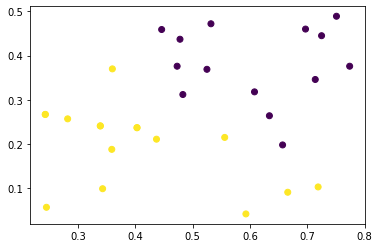

In [327]:
plt.scatter(X_labeled[:,0],X_labeled[:,1],c=Y_labeled);